### CLASSIFICATION (Supervised learning algorthims)

#### Binary logistic regression 

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing of data set


In [318]:
filename="./datasets/exam_scores.txt"
data=pd.read_csv(filename, sep=",", header=None)
data.columns = ["exam_1", "exam_2", "result"]
print("The first few values of the datasets\n")
print(data.head())

The first few values of the datasets

      exam_1     exam_2  result
0  34.623660  78.024693       0
1  30.286711  43.894998       0
2  35.847409  72.902198       0
3  60.182599  86.308552       1
4  79.032736  75.344376       1


In [319]:
training_data = np.loadtxt(filename, delimiter=',', dtype=float)
# storing data in row based arrays
X_train=np.c_[np.ones(training_data.shape[0]) ,training_data[:,:-1]].T
Y_train=np.c_[training_data[:,-1]].T
n=X_train.shape[0]
m=X_train.shape[1]
print("The number of features in our model (n):",n-1)
print("The number of training examples (m):",m)
#checking if our datasets are 
assert((X_train.shape[0]-1)==2)

The number of features in our model (n): 2
The number of training examples (m): 100


#### Understanding of the dataset
The data set contains results of two exams and the output is the results whether the student was selected or not. Much better understanding can be attained if we plot the data

#### Visualization of the dataset

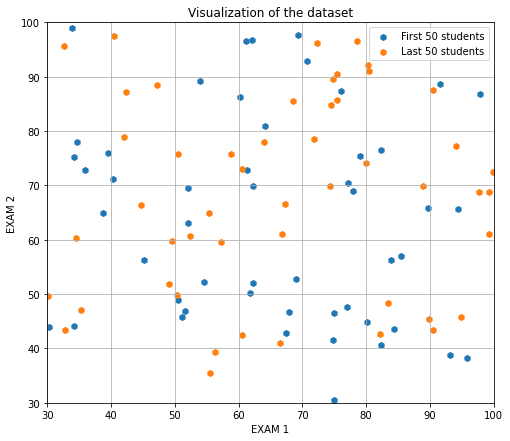

In [320]:
fig,ax =plt.subplots(figsize=(8,7))
ax.scatter(X_train[1,:50],X_train[2,:50],marker='h',label='First 50 students')
ax.scatter(X_train[1,50:],X_train[2,50:],marker='h',label="Last 50 students")
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel("EXAM 1")
plt.ylabel("EXAM 2")
plt.title("Visualization of the dataset")
plt.legend()
plt.grid()

### Analysis of the visualization 
 The scores are between 30 to 100 and the best way to classify the student is by building decision boundary and performing logistic regression 


##### Build a logistic regression model to predict whether a student gets admitted into a university.

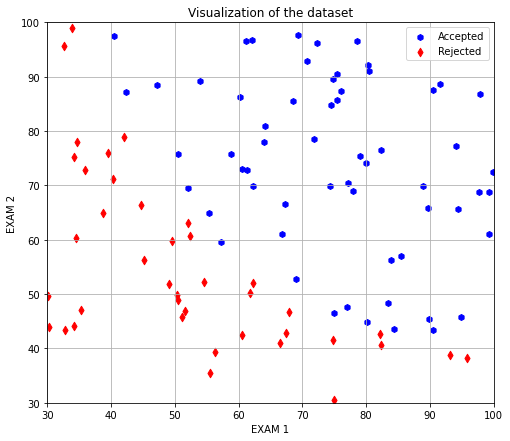

In [321]:
accepted_students=training_data[training_data[:,-1]==1]
rejected_students=training_data[training_data[:,-1]==0]
fig,ax =plt.subplots(figsize=(8,7))
ax.scatter(accepted_students[:,0],accepted_students[:,1],marker='h',color='b',label='Accepted')
ax.scatter(rejected_students[:,0],rejected_students[:,1],marker='d',color='r',label="Rejected")
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel("EXAM 1")
plt.ylabel("EXAM 2")
plt.title("Visualization of the dataset")
plt.legend()
plt.grid()

In [322]:
def sigmoid(z):
    '''
    Input:
    Z= value required to get sigmoid
    output:
    g= sigmoid function output
    '''
    g=1/(1+np.exp(-z))
    return g

assert(sigmoid(0)==0.5)


In [323]:
def hypothesis(X,weights):
    z=np.dot(weights.T,X)
    h=sigmoid(z)
    return h

In [324]:
def cost_function(X,Y,weights,lamda=0):
    '''
    This function calculates the cost function for logistic regression
    X= inputs (n,m)
    Y=(1,m)
    n= number of features\
    m=training examples
    '''
    m=Y.size
    #print(m)
    h=hypothesis(X,weights)
    #print(h.shape)
    #print(Y.shape)
    J=-(1/m)*(np.dot(Y,np.log(h).T)+np.dot((1-Y),np.log(1-h).T))
    return J[0,0]
## setting initial weight equal to zeros
weights=np.zeros((n,1))
print("Initial weights:", weights)
print("The cost function for initial weights:",cost_function(X_train,Y_train,weights))

Initial weights: [[0.]
 [0.]
 [0.]]
The cost function for initial weights: 0.6931471805599453


In [326]:
def grad(X,Y,weights):
    '''
    Calculates the gradients of the cost function 
    '''
    m=Y.size
    h=hypothesis(X,weights)
    grad=(1/m)*np.dot((h-Y),X.T)
    return grad
print("The gradient of cost function for initial weights:",grad(X_train,Y_train,weights))
grd=grad(X_train,Y_train,weights)
assert(grd.shape[1]==n)

The gradient of cost function for initial weights: [[ -0.1        -12.00921659 -11.26284221]]


In [327]:
def gradient_descent(X,Y,weights,learning_rate=0.01,lamda=0,num_iteration=250):
    m=X.shape[1]
    loss=[]
    for i in range(0,num_iteration):
        dw=grad(X,Y,weights)
        weights-=learning_rate*dw.T
        J=cost_function(X,Y,weights,lamda)
        loss.append(J)
    return weights,loss

In [328]:
def logistic_regression(X,Y,learning_rate=0.01,lamda=0,num_iteration=250):
    m=X.shape[1]
    n=X.shape[0]
    initial_weights=np.zeros((n,1))
    weights,loss=gradient_descent(X,Y,initial_weights,learning_rate,lamda,num_iteration)
    plt.plot(np.arange(0,len(loss)),loss)
    plt.xlabel('Number of iteration N')
    plt.ylabel('Cost function J')
    plt.title("MINIMIZATION OF COST FUNCTION LR={}".format(learning_rate))
    return weights

C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


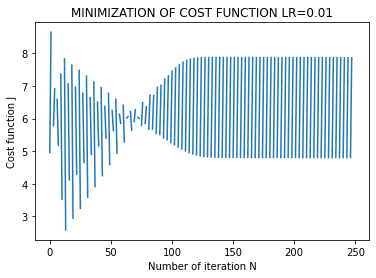

In [329]:
parameters=logistic_regression(X_train,Y_train,0.01,0,250)

In [330]:
print('Gradient descent for logistic regression is not attaining global minima')
print(parameters)

Gradient descent for logistic regression is not attaining global minima
[[-0.19067341]
 [ 0.35419457]
 [-0.11465872]]


The obtained parameters are  [[-0.01737016]
 [ 0.01054578]
 [ 0.00058646]]


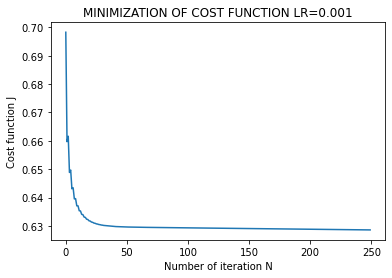

In [331]:
parameters=logistic_regression(X_train,Y_train,0.001,0,250)
print("The obtained parameters are ",parameters)

In [332]:
def predict(weights, X, threshold=0.5):
    h=hypothesis(X,weights)
    y= h >= threshold
    return(y.astype('int'))

In [333]:
p = predict(parameters, X_train) 
print('Accuracy of our model using gradient descent {}%'.format(100*sum((p == Y_train).ravel())/p.size))

Accuracy of our model using gradient descent 60.0%


In [334]:
X_test=np.array([1,20,20])
y = predict(parameters, X_test)
print(y)
print('The model fails to predict the output')

[1]
The model fails to predict the output


#### Using other optimization algorthims like conjugate gradient

In [337]:
from scipy.optimize import minimize
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

weights=np.zeros((3,1))
model = minimize(costFunction, weights, args=(X_train.T,Y_train.T), method=None, jac=gradient, options={'maxiter':250})
model_parameters=model.x
print("The parameters obtained from using minimize function in scipy which solves constrianed based problems",model_parameters)


The parameters obtained from using minimize function in scipy which solves constrianed based problems [-25.16131634   0.2062316    0.20147143]


C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\VISWAMBHAR YASA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [338]:
p = predict(model_parameters, X_train) 
print('Accuracy of our model using group of optimization algorthims {}%'.format(100*sum((p == Y_train).ravel())/p.size))

Accuracy of our model using group of optimization algorthims 89.0%


#### Using scikit learn library to perform logistic regression

In [339]:
from sklearn.linear_model import LogisticRegression
X=np.c_[training_data[:,:-1]]
Y=np.c_[training_data[:,-1]]
sk_model = LogisticRegression(random_state=0).fit(X, Y.ravel())
print("The parmaeters ",sk_model.get_params())

The parmaeters  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [340]:
print("The accuarcy of the model:",sk_model.score(X,Y)*100)
X_test1=np.array([[80,50]])
print('predicting from the model',sk_model.predict(X_test1))

The accuarcy of the model: 89.0
predicting from the model [1.]


In [ ]:
print